# CASE STUDY 6 - Data Preprocessing

> Done by Jose Johnylal

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Loading the dataset and making 'PassengerId' as the index column

In [3]:
data = pd.read_csv('titanic_dataset.csv', index_col = 'PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* **The dataset has 891 rows and 11 columns.**
* **The dataste has missing values present in the dataset.**

## Handling missing values present in all columns of the dataset

It is observed that there are three columns in the dataset have missing values: Age, Cabin, Embarked

#### 1. Filling missing values that are present in 'Age' column

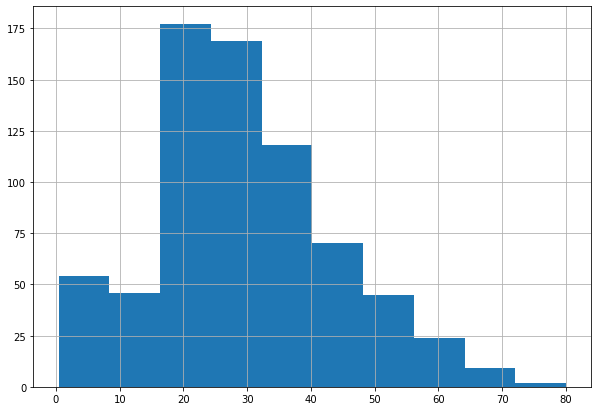

In [7]:
freqgraph = data['Age']
freqgraph.hist(figsize=(10,7))
plt.show()

**Since the 'Age' column is right skewed, the missing values can be filled with the median of the 'Age' column**

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
data['Age'].isna().sum()

0

#### 2. Filling missing values that are present in 'Cabin' and 'Embarked' columns

In [10]:
data['Cabin'] = data['Cabin'].fillna('N00')
data['Embarked'] = data['Embarked'].fillna('NN')

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**All missing values that were present in the dataset have been handled successfully.**

## Checking and handling outliers in atleast three columns of the dataset

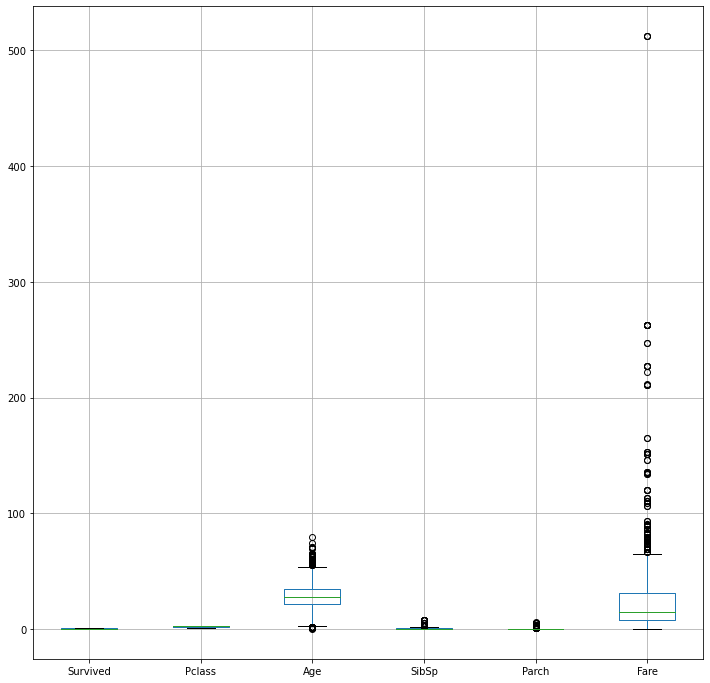

In [12]:
plt.figure(figsize=(12,12))
data.boxplot()
plt.show()

### 1. Outliers in 'Age'

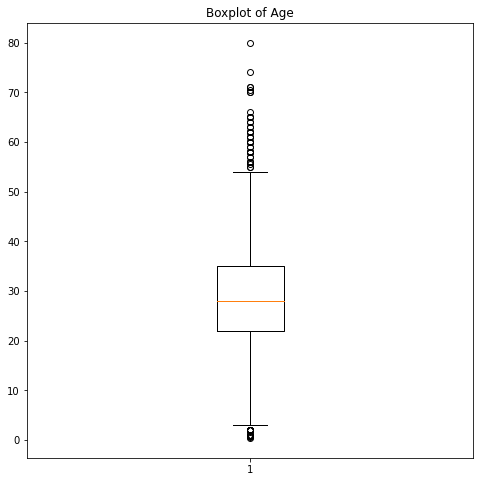

In [13]:
plt.figure(figsize=(8,8))
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')
plt.show()

In [14]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [15]:
ind = data['Age'] > up_lim 
ind1 = data['Age'] < low_lim
data.loc[ind].index, data.loc[ind1].index

(Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
             269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
             556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
             830, 852, 880],
            dtype='int64', name='PassengerId'),
 Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
             470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
            dtype='int64', name='PassengerId'))

In [16]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
             269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
             556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
             830, 852, 880, 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
             470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace = True)

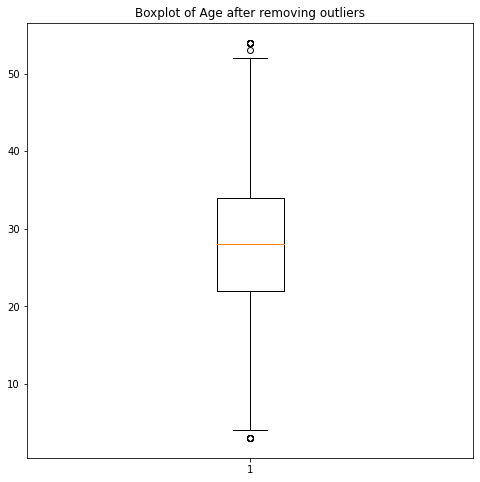

In [17]:
plt.figure(figsize=(8,8))
plt.boxplot(data['Age'])
plt.title('Boxplot of Age after removing outliers')
plt.show()

### 2. Outliers in 'Fare'

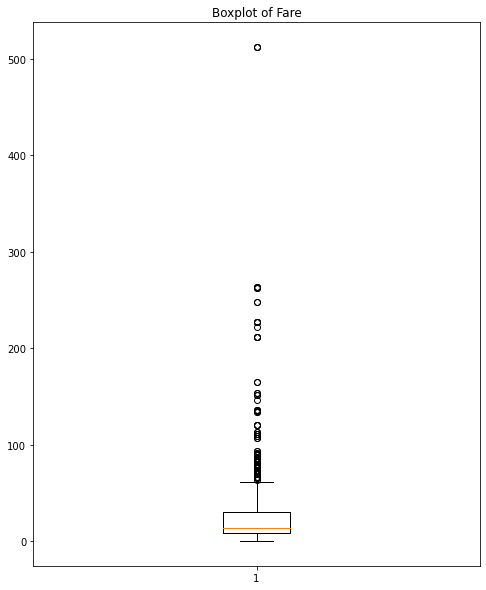

In [18]:
plt.figure(figsize=(8,10))
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [19]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [20]:
ind = data['Fare'] > up_lim 
k = data.loc[ind].index

In [21]:
data.drop(k, inplace = True)

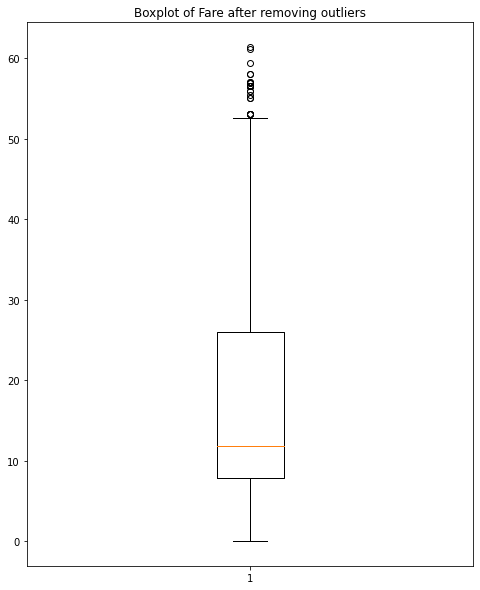

In [22]:
plt.figure(figsize=(8,10))
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare after removing outliers')
plt.show()

### 3. Outliers in 'SibSp'

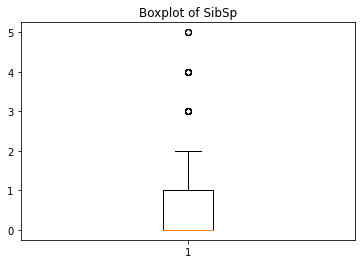

In [23]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')
plt.show()

In [24]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [25]:
ind = data['SibSp'] > up_lim 
k = data.loc[ind].index

In [26]:
data.drop(k, inplace = True)

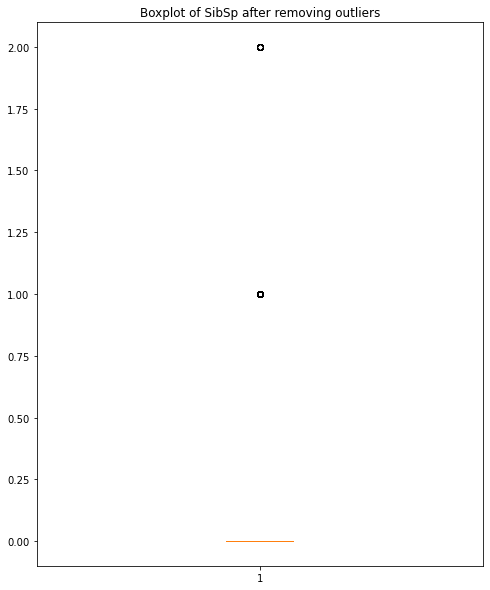

In [27]:
plt.figure(figsize=(8,10))
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp after removing outliers')
plt.show()

## Min Max Scaling on the feature set ('Survived' is target)

In [29]:
from sklearn import preprocessing

**Since there are categorial datas present in the dataset, one hot encoding must be done prior to performing 'min max scaling' on the dataset**

In [69]:
data = pd.get_dummies(data)

In [71]:
data.shape

(689, 1370)

In [72]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N00,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,3,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


**Defining the feature set**

In [73]:
X = data.drop('Survived', axis=1)

In [74]:
X

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N00,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,26.0,0,0,7.9250,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,3,28.0,0,0,8.4583,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
888,1,19.0,0,0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,3,28.0,1,2,23.4500,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [75]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N00,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.272859,0.269956,16.631246,0.001451,0.001451,0.001451,0.001451,0.001451,...,0.002903,0.004354,0.001451,0.001451,0.004354,0.859216,0.001451,0.150943,0.098694,0.750363
std,0.723586,9.545220,0.501020,0.754625,13.092563,0.038097,0.038097,0.038097,0.038097,0.038097,...,0.053838,0.065890,0.038097,0.038097,0.065890,0.348051,0.038097,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Performing min max scaling**

In [76]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [77]:
X = min_max.fit_transform(X)

In [78]:
X = pd.DataFrame(X)

In [79]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368
count,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959,0.001451,0.001451,0.001451,0.001451,0.001451,...,0.002903,0.004354,0.001451,0.001451,0.004354,0.859216,0.001451,0.150943,0.098694,0.750363
std,0.361793,0.187161,0.25051,0.125771,0.213306,0.038097,0.038097,0.038097,0.038097,0.038097,...,0.053838,0.065890,0.038097,0.038097,0.065890,0.348051,0.038097,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.00000,0.000000,0.171068,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.00000,0.000000,0.382051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**It is observed that all columns are in a specific range. Hence, min max scaling has been executed successfully on the dataset.**